In [1]:
# imports
import torch
import torchvision
from torchvision.io import read_image
import torchvision.transforms as T
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import os

from tensorflow.keras.preprocessing.image import img_to_array, load_img
# imports



from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Rescaling, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# For reproducibility
np.random.seed(42)

In [2]:
# read the jpg image
#pic = read_image(C:\Users\jerem\Desktop\SarsCovidCt\COVID\Covid (1).png)

from google.colab import drive
drive.mount('/content/drive')

#from google.colab import files
#import io
 
 


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define class name variable
class_names = train_ds.class_names

In [ ]:
#Get Data From Zip
#!unzip COVID-19_Radiography_Dataset.zip

import shutil

#Remove Masks in Datasets https://pynative.com/python-delete-files-and-directories/#h-delete-a-non-empty-directory-using-shutil
classes = ['COVID','Lung_Opacity','Normal','Viral Pneumonia']

  
train_ds = image_dataset_from_directory(
    directory = '/content/drive/MyDrive/Colab Notebooks/CT Images/Radiography/COVID-19_Radiography_Dataset',
    image_size=(224,224),
    batch_size=32,
    seed=42,
    validation_split=0.1,
    shuffle = True,
    subset='training',
)

class_names = train_ds.class_names

plt.figure(figsize=(15, 15))
for images, labels in train_ds.take(1):
  for i in range(25):
    ax = plt.subplot(5,5 , i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Found 21165 files belonging to 4 classes.
Using 19049 files for training.


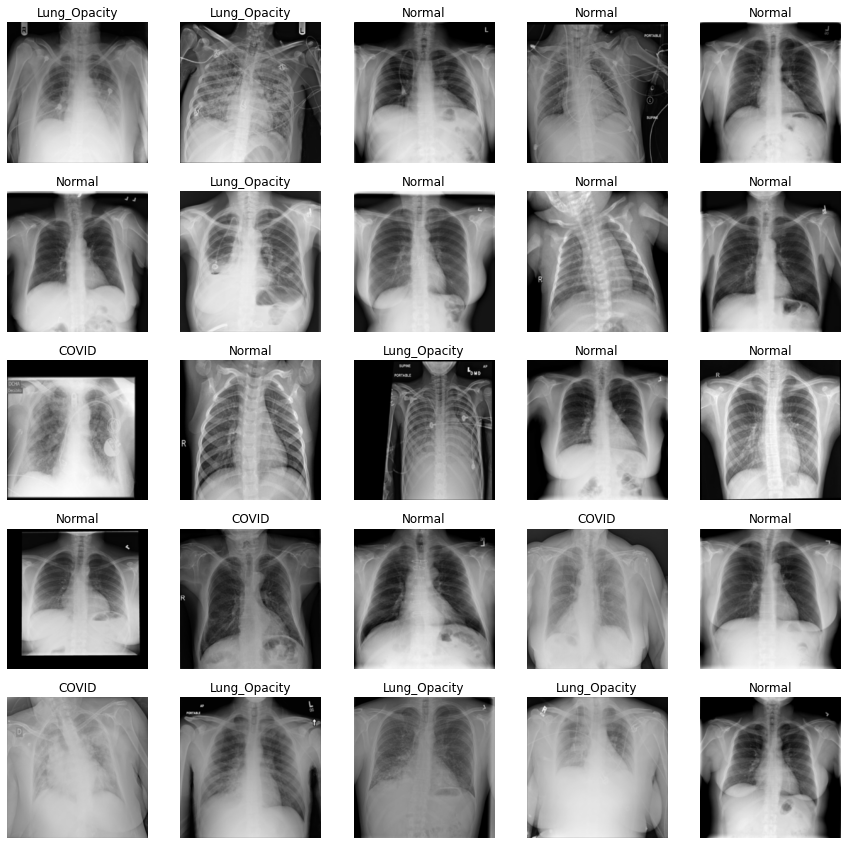

In [3]:
train_ds = image_dataset_from_directory(
    directory = '/content/drive/MyDrive/Colab Notebooks/CT Images/Radiography/COVID-19_Radiography_Dataset',
    image_size=(224,224),
    batch_size=32,
    seed=42,
    validation_split=0.1,
    shuffle = True,
    subset='training',
)

class_names = train_ds.class_names

plt.figure(figsize=(15, 15))
for images, labels in train_ds.take(1):
  for i in range(25):
    ax = plt.subplot(5,5 , i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
model = Sequential()
model.add(Rescaling(1./255,input_shape = (256,256,3)))
model.add(Conv2D(16,3,padding='same',activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, 3, padding='same', activation='relu'),)
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, padding='same', activation='relu'),)
model.add(MaxPooling2D())
model.add(Dropout(0.35))

model.add(Conv2D(64, 3, padding='same', activation='relu'),)
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(128,activation = 'relu',kernel_regularizer = l2(0.001)))
model.add(Dense(4,activation='softmax'))

# Had an error of None,1 not matching None,4, image_from_directory returns the output as a sparse matrix
# credits to https://www.kaggle.com/general/197993
model.compile(optimizer ='adam',loss ='sparse_categorical_crossentropy',metrics =['acc'])

In [ ]:
callback = EarlyStopping(patience=5)


In [4]:
val_ds = image_dataset_from_directory(
    directory = '/content/drive/MyDrive/Colab Notebooks/CT Images/Radiography/COVID-19_Radiography_Dataset',
    image_size=(224,224),
    batch_size=32,
    seed=42,
    validation_split=0.1,
    shuffle = True,
    subset='validation',
)

Found 21165 files belonging to 4 classes.
Using 2116 files for validation.


In [ ]:
history.shape

In [ ]:
#history = model.fit(train_ds, validation_data= val_ds, callbacks = callback )

In [ ]:
plt.plot(history.history['loss'], label = 'Train')
plt.plot(history.history['val_loss'], label = 'Test')
plt.legend();

In [ ]:
# Transfer learning model 

In [5]:
# imports 
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

In [6]:
effnet = EfficientNetB0(include_top=False, weights = 'imagenet', input_shape = (224,224,3), classes = 4)

16705208/16705208 [==============================] - 0s 0us/step


In [7]:
effnet.trainable = False


In [8]:
np.random.seed(42)

In [10]:
model_t = Sequential()
model_t.add(effnet)
model_t.add(GlobalAveragePooling2D())
model_t.add(Dense(64, activation='relu'))
model_t.add(Dense(4,activation='softmax'))


In [11]:
model_t.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [11]:
model_t.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 64)                81984     
                                                                 
 dense_1 (Dense)             (None, 4)                 260       
                                                                 
Total params: 4,131,815
Trainable params: 82,244
Non-trainable params: 4,049,571
_________________________________________________________________


In [13]:
history2 = model_t.fit(train_ds, 
                     validation_data=val_ds,
                     epochs = 5
          )

Epoch 1/50
596/596 [==============================] - 16s 27ms/step - loss: 0.2210 - acc: 0.9173 - val_loss: 0.2764 - val_acc: 0.8937
Epoch 2/50
596/596 [==============================] - 17s 28ms/step - loss: 0.2116 - acc: 0.9223 - val_loss: 0.2798 - val_acc: 0.9012
Epoch 3/50
596/596 [==============================] - 17s 27ms/step - loss: 0.2057 - acc: 0.9236 - val_loss: 0.2835 - val_acc: 0.8970
Epoch 4/50
596/596 [==============================] - 16s 27ms/step - loss: 0.1969 - acc: 0.9271 - val_loss: 0.2719 - val_acc: 0.9036
Epoch 5/50
596/596 [==============================] - 16s 27ms/step - loss: 0.1888 - acc: 0.9302 - val_loss: 0.3021 - val_acc: 0.8913
Epoch 6/50
596/596 [==============================] - 16s 27ms/step - loss: 0.1799 - acc: 0.9328 - val_loss: 0.2753 - val_acc: 0.9069
Epoch 7/50
596/596 [==============================] - 16s 27ms/step - loss: 0.1733 - acc: 0.9362 - val_loss: 0.2681 - val_acc: 0.9060
Epoch 8/50
596/596 [==============================] - 17s 27ms

In [ ]:
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=285)

save_and_display_gradcam(img_path, heatmap)

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [ ]:
model_builder = keras.applications.xception.Xception
img_size = (2224, 2224)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = "block14_sepconv2_act"

# The local path to our target image
img_path = keras.utils.get_file(
    "african_elephant.jpg", "https://i.imgur.com/Bvro0YD.png"
)

display(Image(img_path))